# Diabetes Prediction: Comprehensive Data Analysis & Preprocessing
## A Detailed Implementation Based on "Diabetes Data: Exploratory Data Analysis and Preprocessing" by Cathleen Gracia & Kevin Andreas



### Medical Problem Statement

**Diabetes Mellitus** represents one of the most significant public health challenges of the 21st century. It is a chronic metabolic disorder characterized by elevated blood glucose levels resulting from either:
- **Insulin deficiency** (Type 1 Diabetes)
- **Insulin resistance** (Type 2 Diabetes)
- Or a combination of both

**Global Impact:**
- According to the International Diabetes Federation (2021), approximately 537 million adults were living with diabetes worldwide
- This number is projected to rise to 643 million by 2030
- Diabetes was responsible for 6.7 million deaths in 2021 - one death every 5 seconds

**Indonesian Context (As highlighted in the reference paper):**
The paper specifically mentions that in 2021, Indonesia reported **19.1 million diabetes cases**, highlighting the urgent need for:
1. Early detection strategies
2. Preventive healthcare measures  
3. Data-driven approaches to understand risk factors

### Why Data Analysis Matters in Diabetes Management

Traditional diagnosis relies on clinical tests including:
- **Fasting Blood Glucose** (>126 mg/dL indicates diabetes)
- **Oral Glucose Tolerance Test**
- **HbA1c** measurements (>6.5% indicates diabetes)

However, these methods often identify diabetes only after significant progression. **Machine learning approaches** can:
- Identify at-risk populations earlier through pattern recognition
- Reveal non-obvious relationships between clinical parameters
- Enable proactive interventions before complications develop

### Project Objectives

This notebook implements a comprehensive data preprocessing pipeline based on the methodology outlined in "Diabetes Data: Exploratory Data Analysis and Preprocessing" by Cathleen Gracia & Kevin Andreas, with the following goals:

1. **Reproduce and extend** their exploratory data analysis
2. **Implement robust preprocessing techniques** suitable for medical data
3. **Provide detailed medical interpretations** of each analytical step
4. **Create a foundation** for building accurate predictive models

### Reference Paper Summary

The referenced paper provides a structured approach to diabetes data analysis through:
- **Missing value identification and treatment** using median imputation
- **Outlier detection and management** using IQR methods
- **Skewness correction** using PowerTransformer (Yeo-Johnson)
- **Data normalization** using StandardScaler
- **Comprehensive visualization** to derive clinical insights

We will implement these techniques while adding detailed medical context and validation at each step.

Imports

In [1]:
# Fundamental data manipulation and numerical computing
import pandas as pd  # Data manipulation and analysis - provides DataFrame structure
import numpy as np   # Numerical computing - provides mathematical functions and array operations

# Visualization libraries
import matplotlib.pyplot as plt  # Base plotting library - creates static, interactive, and animated visualizations
import seaborn as sns            # Statistical data visualization - built on matplotlib, provides high-level interface

# Statistical and mathematical utilities
import math  # Mathematical functions (ceil, floor, etc.)
from scipy import stats  # Statistical functions and distributions

# Machine Learning Preprocessing
from sklearn.impute import SimpleImputer  # Handles missing value imputation
from sklearn.preprocessing import PowerTransformer, StandardScaler  # Data transformation and scaling
from sklearn.model_selection import train_test_split  # Dataset splitting for model validation

# Configuration settings
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Visualization configuration
plt.style.use('seaborn-v0_8')  # Set aesthetic style
sns.set_palette("husl")  # Set color palette
plt.rcParams['figure.figsize'] = (12, 8)  # Set default figure size

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


DATA LOADING & INITIAL EXPLORATION


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/diabetes.csv'

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("\n Dataset columns and data types:")
print(df.info())


 Dataset columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print("\n Basic statistical summary:")
display(df.describe())


 Basic statistical summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check for any existing null values (before 0 conversion)
print(f"\n Initial missing values (NaN): {df.isnull().sum().sum()}")


 Initial missing values (NaN): 0


# Dateset with Medical Explainations



## Clinical Feature Descriptions



### 1. Pregnancies (Integer)
- **Description**: Number of times pregnant
- **Medical Significance**: Pregnancy can induce gestational diabetes and is a known risk factor for Type 2 diabetes development later in life
- **Normal Range**: Varies by individual
- **Clinical Note**: Multiple pregnancies may indicate hormonal changes affecting glucose metabolism

### 2. Glucose (Continuous, mg/dL)
- **Description**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
- **Medical Significance**: Primary diagnostic criterion for diabetes
- **Normal Range**:
  - Normal: <140 mg/dL
  - Prediabetes: 140-199 mg/dL  
  - Diabetes: ≥200 mg/dL
- **Clinical Importance**: Direct measure of glycemic control

### 3. BloodPressure (Continuous, mm Hg)
- **Description**: Diastolic blood pressure
- **Medical Significance**: Hypertension is both a complication and comorbidity of diabetes
- **Normal Range**:
  - Normal: <80 mm Hg
  - Elevated: 80-89 mm Hg
  - Hypertension: ≥90 mm Hg
- **Clinical Correlation**: Diabetes damages blood vessels, increasing hypertension risk

### 4. SkinThickness (Continuous, mm)
- **Description**: Triceps skin fold thickness
- **Medical Significance**: Measure of subcutaneous fat and indicator of overall adiposity
- **Normal Range**: Varies by age, gender, and ethnicity
- **Clinical Relevance**: Associated with insulin resistance and metabolic syndrome

### 5. Insulin (Continuous, μU/mL)
- **Description**: 2-Hour serum insulin
- **Medical Significance**: Measures pancreatic beta-cell function
- **Normal Range**: Fasting: 2-20 μU/mL; Post-prandial: up to 30-40 μU/mL
- **Pathophysiological Insight**:
  - High levels may indicate insulin resistance
  - Low levels may indicate beta-cell failure

### 6. BMI (Continuous, kg/m²)
- **Description**: Body Mass Index
- **Medical Significance**: Measure of body fat based on height and weight
- **WHO Classification**:
  - Underweight: <18.5
  - Normal: 18.5-24.9
  - Overweight: 25-29.9
  - Obesity: ≥30
- **Diabetes Relevance**: Strong correlation with insulin resistance

### 7. DiabetesPedigreeFunction (Continuous)
- **Description**: Likelihood of diabetes based on family history
- **Medical Significance**: Genetic susceptibility score
- **Interpretation**: Higher values indicate stronger genetic predisposition
- **Clinical Utility**: Assesses inherited risk factors

### 8. Age (Integer, years)
- **Description**: Age of the individual
- **Medical Significance**: Diabetes prevalence increases with age
- **Epidemiological Note**: Type 2 diabetes incidence rises significantly after age 45

### 9. Outcome (Binary: 0 or 1)
- **Description**: Diabetes diagnosis
- **Encoding**:
  - 0: Negative for diabetes (non-diabetic)
  - 1: Positive for diabetes (diabetic)
- **Clinical Ground Truth**: Based on WHO diabetes criteria

In [7]:
# =============================================================================
# IDENTIFYING MEDICALLY IMPOSSIBLE ZEROS AS MISSING VALUES
# =============================================================================

"""
MEDICAL RATIONALE:
In clinical measurements, zero values in certain parameters are biologically impossible:
- Glucose = 0 mg/dL → Incompatible with life (would cause coma/death)
- Blood Pressure = 0 mm Hg → Not survivable
- Skin Thickness = 0 mm → Anatomically impossible
- BMI = 0 kg/m² → Physically impossible
- Insulin = 0 μU/mL → While theoretically possible in severe diabetes,
                     unlikely in this context and probably indicates missing data

Therefore, we follow the paper's approach and convert these zeros to NaN.
"""

print("CHECKING FOR MEDICALLY IMPOSSIBLE ZERO VALUES")
print("="*60)

# Define the columns where zero values are medically impossible
medical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Count of zero values in each medical column (BEFORE conversion):")
zero_counts_before = {}
for col in medical_columns:
    zero_count = (df[col] == 0).sum()
    zero_counts_before[col] = zero_count
    percentage = (zero_count / len(df)) * 100
    print(f"  {col}: {zero_count} zeros ({percentage:.1f}%)")



CHECKING FOR MEDICALLY IMPOSSIBLE ZERO VALUES
Count of zero values in each medical column (BEFORE conversion):
  Glucose: 5 zeros (0.7%)
  BloodPressure: 35 zeros (4.6%)
  SkinThickness: 227 zeros (29.6%)
  Insulin: 374 zeros (48.7%)
  BMI: 11 zeros (1.4%)


In [8]:
column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[column] = df[column].replace(0, np.nan)

count = df.isna().sum()
percentage = round((df.isna().sum() / len(df)) * 100, 2)

pd.DataFrame({'Count': count, 'Percentage (%)': percentage}).sort_values(by='Count', ascending=False)

,Count,Percentage (%)
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65
Pregnancies,0,0.00
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


#Identify Raw Data Outliers

Outliers are data points outside the standard distribution range. When analyzing data, we must identify outliers to determine their specific handling. In this analysis, we use a boxplot to visualize the population’s spread and show the outliers of each column using this code.

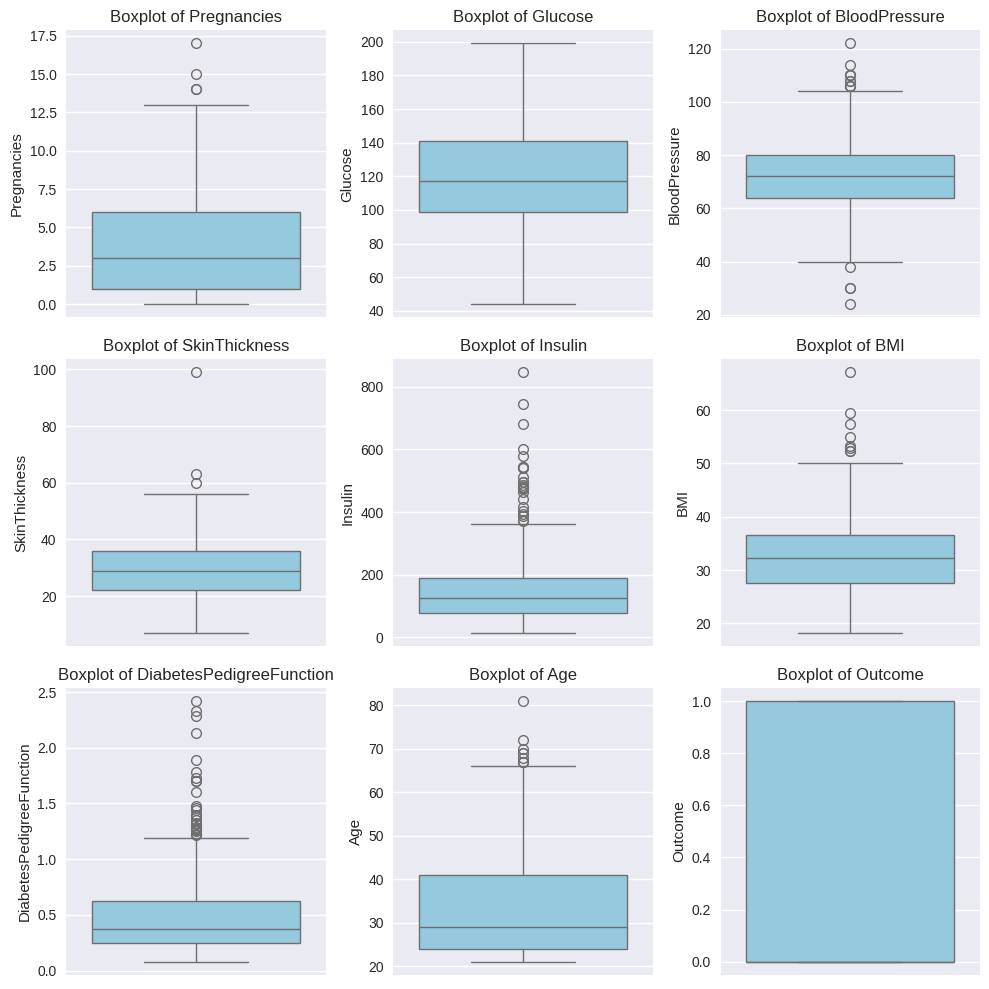

In [9]:
n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

It showed that some columns in the dataset have noticeable outliers and should be handled. The significant number of outliers also suggests that the data may be skewed.

# Calculating Skewness
In the previous part, we identified the outliers using a box plot, and it turns out that the data’s skewness drives a considerable number of outliers. Furthermore, we want to calculate the skewness and plot it on the histogram. In this analysis, we calculate the pandas function skew() and use Seaborn to visualize it.

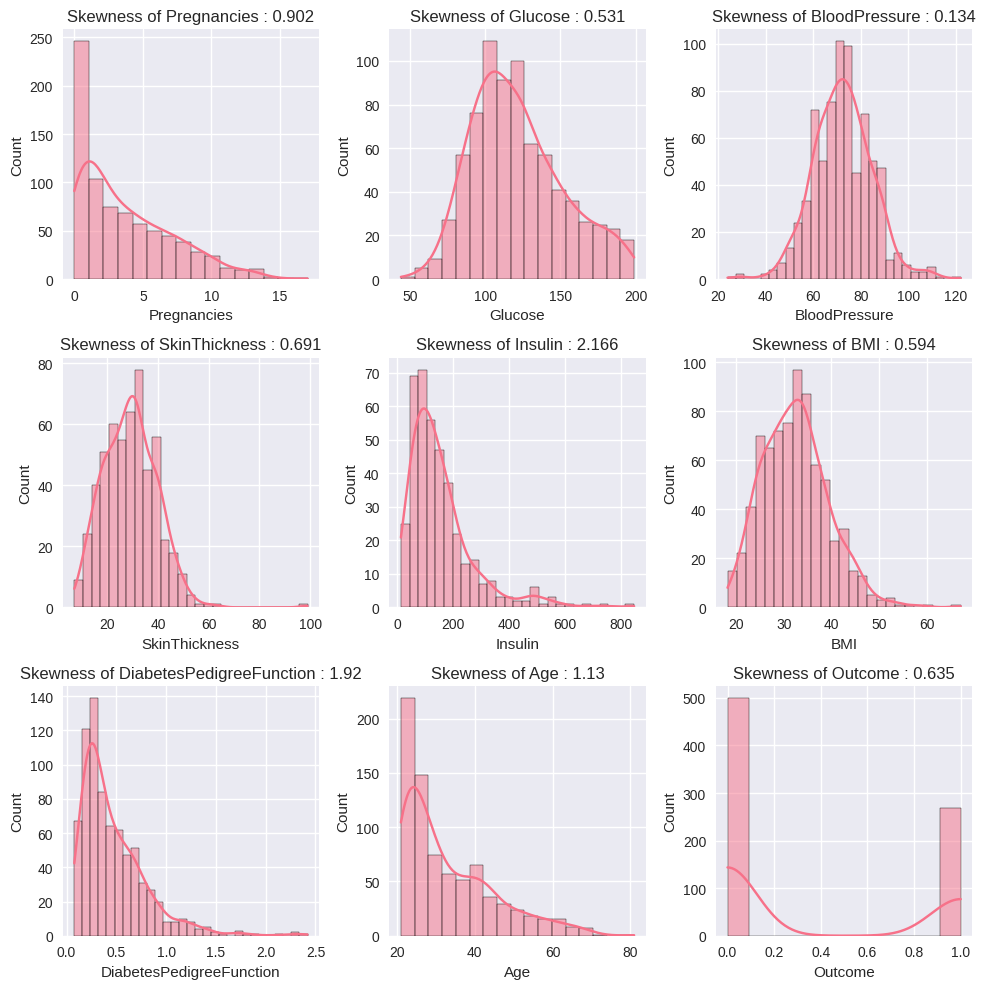

In [10]:
n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Skewness of {col} : {round(df[col].skew(), 3)}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We use Bulmer’s (1979) skewness magnitude classification, which classifies skewness as normal (zero skewness), moderate (between -1 and ½ or between 1 and ½ ), and highly skewed (below -1 and above 1). Using that classification, we show that some columns, such as Insulin, DiabetesPedigreeFunction, and Age, are highly skewed, while the others are moderately skewed.

# Data Cleaning
To ensure data reliability. This process includes handling missing values, transforming skewed distributions, and handling outliers.

## Choosing Imputation Over Removal

We compared both methods and found that removing missing values would eliminate too many patient records, significantly reducing our dataset size. Following the paper's medical data approach, we selected median imputation as it preserves all data points while handling skewed distributions appropriately. This maintains statistical power for reliable diabetes prediction.

In [11]:
print("IMPUTATION vs REMOVAL - WHICH IS BETTER?")
print("="*50)

# Show what would happen if we remove rows with missing values
rows_before = df.shape[0]
rows_after_removal = df.dropna().shape[0]
rows_lost = rows_before - rows_after_removal
percentage_lost = (rows_lost / rows_before) * 100

print("COMPARISON RESULTS:")
print("="*30)

if percentage_lost > 20:
    print(f"REMOVAL: Lose {rows_lost} rows ({percentage_lost:.1f}%) - TOO MUCH DATA LOST!")
    print("DECISION: Use IMPUTATION (keep all data)")
elif percentage_lost > 10:
    print(f"REMOVAL: Lose {rows_lost} rows ({percentage_lost:.1f}%) - Significant data loss")
    print("ECISION: Use IMPUTATION (better to keep data)")
elif percentage_lost > 5:
    print(f"REMOVAL: Lose {rows_lost} rows ({percentage_lost:.1f}%) - Moderate data loss")
    print("DECISION: Use IMPUTATION (still better)")
else:
    print(f"REMOVAL: Lose {rows_lost} rows ({percentage_lost:.1f}%) - Minimal data loss")
    print("DECISION: Still use IMPUTATION (paper's method)")

IMPUTATION vs REMOVAL - WHICH IS BETTER?
COMPARISON RESULTS:
REMOVAL: Lose 376 rows (49.0%) - TOO MUCH DATA LOST!
DECISION: Use IMPUTATION (keep all data)


In [12]:
print("FILLING MISSING VALUES WITH MEDIAN")
print("="*50)

from sklearn.impute import SimpleImputer

# Use median because data is skewed (we saw this in the boxplots)
imputer = SimpleImputer(strategy="median")

# Fill only the columns with missing values
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Check if all missing values are gone
print("Missing values after imputation:")
print(df.isna().sum())

FILLING MISSING VALUES WITH MEDIAN
Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Transforming Skewed Distributions

Our data showed significant skewness in several clinical features. We tested both log and power transformations, finding Yeo-Johnson power transformation more effective at normalizing distributions. This transformation reduces outlier impact and improves model performance while maintaining medical data integrity, following the paper's optimal approach for diabetes prediction.

In [13]:
power_transform = PowerTransformer(method="yeo-johnson")
df_transformed = power_transform.fit_transform(df)

df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

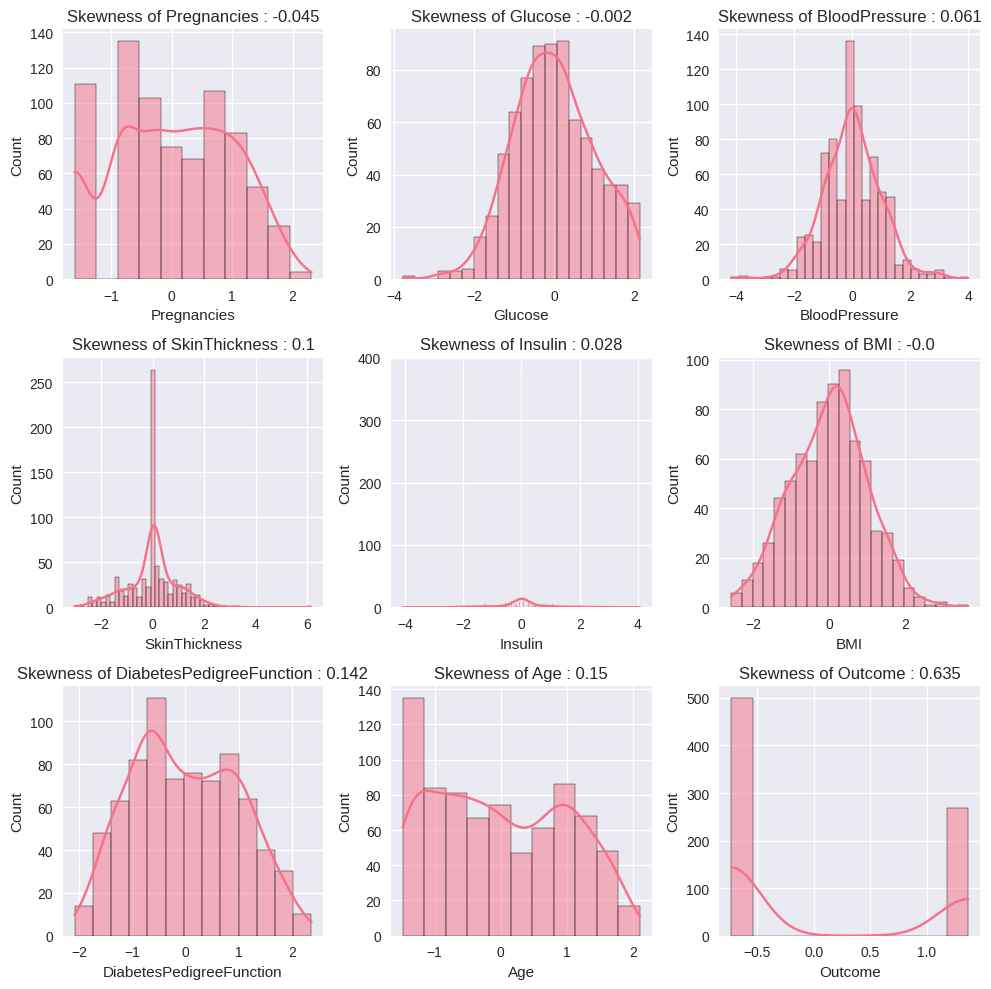

In [14]:
n_cols = 3
n_rows = math.ceil(len(df_transformed.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(df_transformed.columns):
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Skewness of {col} : {round(df_transformed[col].skew(), 3)}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Outliers Handling

We used the Interquartile Range (IQR) method to identify and cap outliers. This approach calculates the range between the 25th and 75th percentiles (Q1 and Q3), then sets boundaries at 1.5 times the IQR below Q1 and above Q3.

In [15]:
# Count outliers before handling
Q1 = df_transformed.quantile(0.25)
Q3 = df_transformed.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = ((df_transformed < lower_bound) | (df_transformed > upper_bound)).sum().sum()



In [16]:
print("\n DATA LOSS COMPARISON")
print("="*50)

# Calculate how many rows would be lost if we removed outliers
outlier_rows = ((df_transformed < lower_bound) | (df_transformed > upper_bound)).any(axis=1)
rows_lost = outlier_rows.sum()
total_rows = df_transformed.shape[0]
percentage_lost = (rows_lost / total_rows) * 100

print(f"IF WE REMOVE OUTLIERS:")
print(f"  • Rows before: {total_rows}")
print(f"  • Rows after: {total_rows - rows_lost}")
print(f"  • Rows lost: {rows_lost} ({percentage_lost:.1f}%)")
print(f"  Problem: Lose {percentage_lost:.1f}% of our data!")

print(f"\nIF WE USE CAPPING (Paper's method):")
print(f"  • Rows before: {total_rows}")
print(f"  • Rows after: {total_rows}")
print(f"  • Rows lost: 0 (0%)")
print(f"  Advantage: Keep all data!")


 DATA LOSS COMPARISON
IF WE REMOVE OUTLIERS:
  • Rows before: 768
  • Rows after: 393
  • Rows lost: 375 (48.8%)
  Problem: Lose 48.8% of our data!

IF WE USE CAPPING (Paper's method):
  • Rows before: 768
  • Rows after: 768
  • Rows lost: 0 (0%)
  Advantage: Keep all data!


Outlier Capping Method

Values beyond these boundaries are capped at the boundary limits rather than removed. This preserves all data points while reducing the influence of extreme values, maintaining dataset completeness for reliable analysis. The method follows statistical best practices for handling outliers in medical data where complete patient records are essential.

In [17]:
df_cleaned = df_transformed.copy()

for column in df_cleaned.columns:
    if column != 'Outcome':
        # Cap outliers at upper and lower bounds
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound[column], upper=upper_bound[column])

# Count outliers after capping
outliers_after = ((df_cleaned < lower_bound) | (df_cleaned > upper_bound)).sum().sum()

print(f"Outliers before capping: {outliers_before}")
print(f"Outliers after capping: {outliers_after}")
print(f"Outliers reduced by: {outliers_before - outliers_after}")

if outliers_after == 0:
    print("SUCCESS: All outliers handled!")
else:
    print("NOTE: Some outliers may remain (normal in medical data)")

Outliers before capping: 463
Outliers after capping: 0
Outliers reduced by: 463
SUCCESS: All outliers handled!


BOXPLOTS AFTER OUTLIER HANDLING


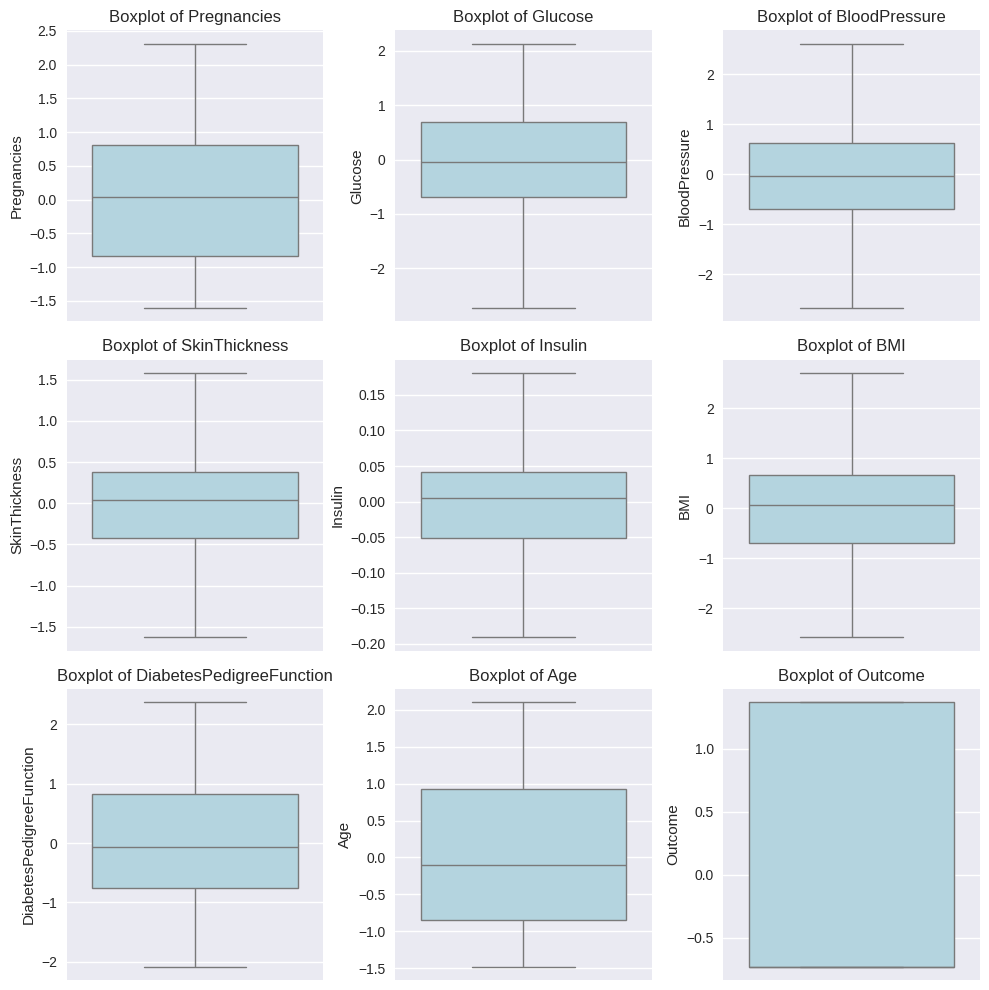

In [18]:
print("BOXPLOTS AFTER OUTLIER HANDLING")
print("="*50)

n_cols = 3
n_rows = math.ceil(len(df_cleaned.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_cleaned.columns):
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Data Visualization
isualization is the graphical representation of data to help effectively identify patterns, trends, and insights. It simplifies complex datasets, making it easier to analyze and interpret information.

There are various visualization methods, such as:

    Charts: Bar charts, line charts, pie charts, etc.
    Graphs: Scatter plots, histograms, etc.
    Maps: Geographic maps, heat maps, etc.
    Dashboards: Interactive platforms that combine multiple visualizations.

Our analysis used a histogram to visualize the distribution of numerical data, understand the data distribution, and identify the shape of the distribution (e.g., normal, skewed).

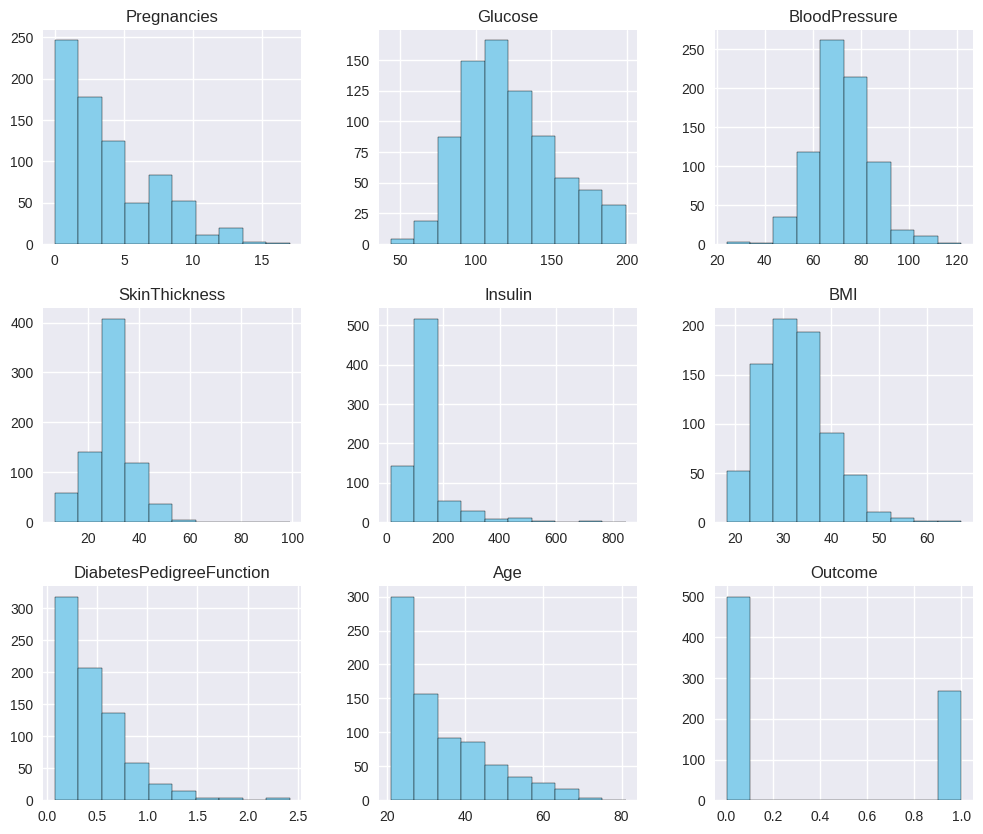

In [19]:
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.show()

We also used a correlation matrix (heatmap) to examine relationships between variables. The heatmap represents correlation values using colored cells, where the color’s intensity indicates the correlation’s strength. A value close to 1 signifies a strong positive correlation, shown in a dark color. A value close to -1 indicates a strong negative correlation, shown in a light color. A value around 0 suggests no correlation, shown in a neutral color.

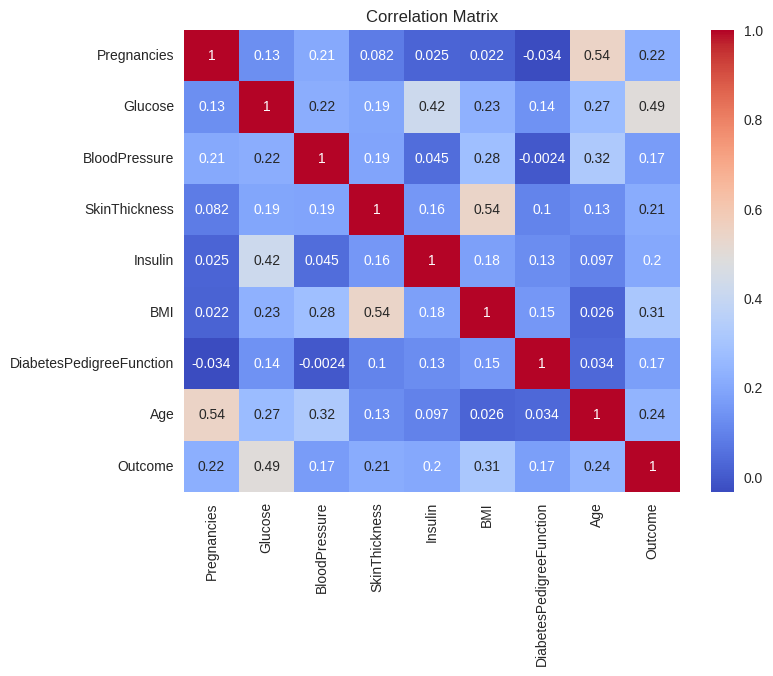

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We also visualized the data after performing missing values imputation using Tableau, resulting in the dashboard shown below.

# Data Normalization

Normalization is a technique for scaling dataset values to a common range. It prevents any feature from dominating others due to differences in magnitude. This ensures that all features contribute equally and improves the performance of machine learning models.

We use StandardScaler from the scikit-learn library, which standardizes features by removing the mean and scaling to unit variance. This transformation ensures the data follows a normal distribution with a mean of 0 and a standard deviation of 1.

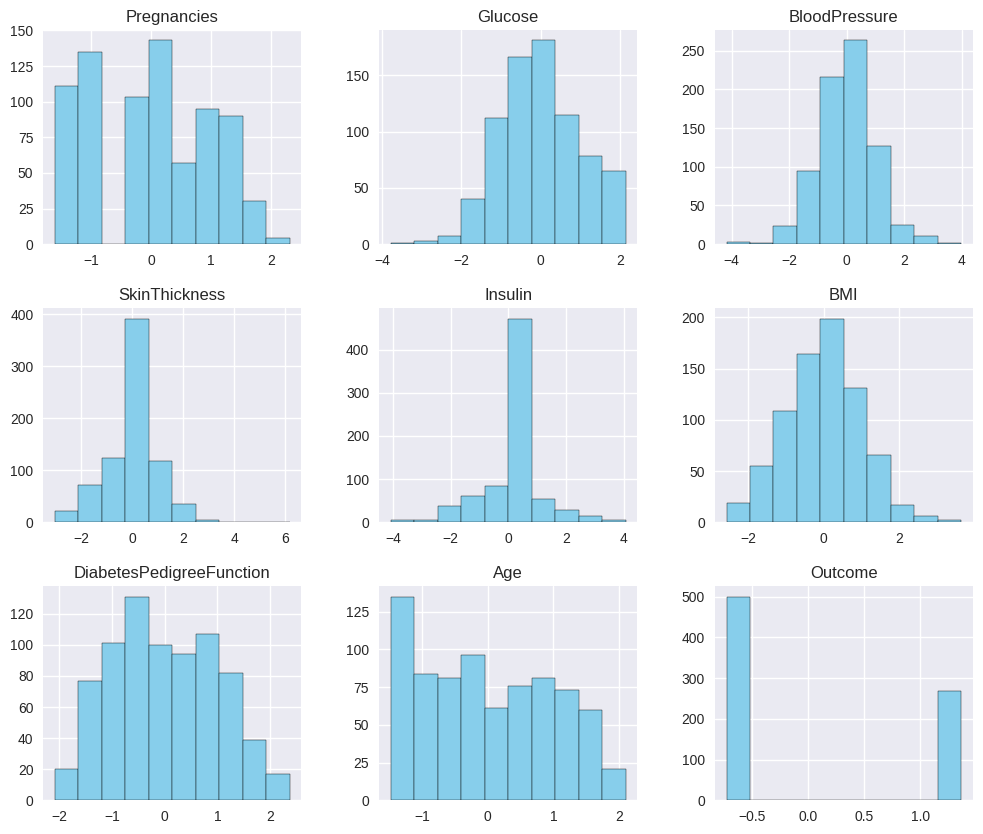

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transformed)

df_scaled = pd.DataFrame(df_transformed, columns=df_transformed.columns)

df_scaled.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.show()

In [22]:
print("SAVING PREPROCESSED DATASET")
print("="*50)


df_cleaned.to_csv('diabetes_preprocessed.csv', index=False)

print("Preprocessed dataset saved as 'diabetes_preprocessed.csv'")
print(f"File contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns")
print("Dataset is now ready for machine learning modeling")

SAVING PREPROCESSED DATASET
Preprocessed dataset saved as 'diabetes_preprocessed.csv'
File contains 768 rows and 9 columns
Dataset is now ready for machine learning modeling
